<a href="https://colab.research.google.com/github/erobrien6/OBrien_DSPN_S23/blob/main/Exercise_17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 17: Regularized regression

This homework assignment is designed to give you an intuition as an interesting property of regularization in the context of ultra-high dimensional statistical problems.

You won't need to load in any data for this homework.

---
## 1. Simulating & visualizing data (2 points)

We are going to be looking at what happens in the context where $p>n$. In order to have total control over our data, we will use simulations for this homework. First, we will need to load the `glmnet`, `tidyverse`, and `ggplot2` libraries for this assignment. 


In [ ]:
#install.packages('glmnet')

library(tidyverse)
library(ggplot2)
library(glmnet) 



We are going to generate a data set with complex structure and try to recover it using polynomial models. For simplicity sake, use the following code to produce a response variable, $y$ that has complex structure.

*Hint: Look up what a cosine function looks like if you need a reminder.*

In [2]:
# Generate data
set.seed(121)
sigma_noise = .5
x=seq(-9,9,by=.18)
n=length(x)
y = 0.1*x + cos(x) + cos(x/20)+rnorm(n,sd=sigma_noise)

(a) Break the data into a training set (n=50) and test set (n=51) using the `sample` function to randomly select subsets of x and y.  Make a separate data frame for the training and test data.

(**Note**: *Do not* just take the first 50 observations to be the training set and last 51 observations to be the test set.)

In [3]:
#Create dataset
df_hw <- data.frame(x, y)

#Training data - "not test" rows
test <- sample(1:nrow(df_hw),51)
df_test <- df_hw[test ,]
df_train <- df_hw[-test ,]

head(df_test)
head(df_train)

dim(df_test)
dim(df_train)



,x,y
,<dbl>,<dbl>
9,-7.56,-0.08663415
82,5.58,2.40786448
61,1.80,1.00645142
48,-0.54,2.01487369
43,-1.44,0.10934315
24,-4.86,1.08539063


,x,y
,<dbl>,<dbl>
4,-8.46,-0.5442746
6,-8.10,0.6732243
11,-7.20,1.5256458
12,-7.02,0.5469083
13,-6.84,0.9066007
14,-6.66,0.9259283


[1] 51  2

[1] 50  2

(b) Plot the training data ($x$ \& $y$). Describe the relationship that you see in the training data.

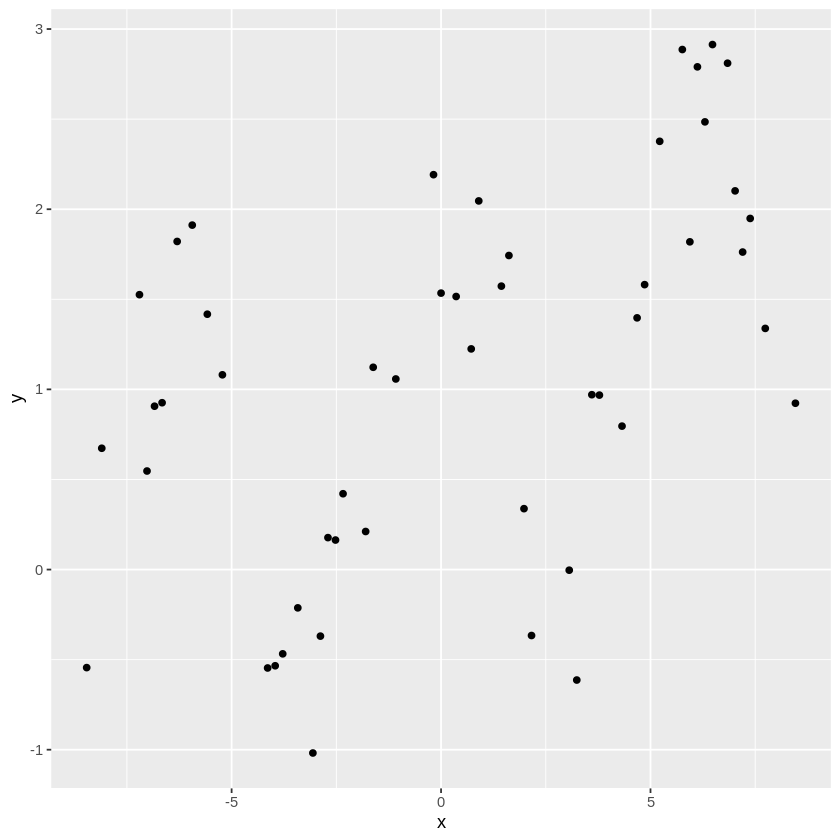

In [4]:
library(tidyverse)
ggplot(data=df_train, aes(x=x, y=y)) +
  geom_point()



How would you describe the relationship between $x$ and $y$ based on this plot?

> *Overall, x and y appear to be positively associated. There also appear to be clusters of data present which is likely due to the complex cosine relationship bewteen x and y.*
> 

---
## 2. Bias-variance tradeoff: polynomial regression (4 points)

Recall that in polynomial regression we increase model complexity by expanding $x$ out to the power $k$ (which we call degree).


$$Y = \hat{\beta}_0 + \sum_{j=1}^K \hat{\beta}_jX^j $$  

$$ = poly(x,k)$$

(a) Fit a 2nd degree polynomial regression model to the training data. Plot the results. 


*Hint: Use the* `help` *function to see how to use the* `stat_smooth()` *and* `poly()` *functions.*


Call:
lm(formula = y ~ poly(x, 2), data = df_train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.79624 -0.62956  0.01281  0.78174  1.47047 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.0664     0.1254   8.502 4.59e-11 ***
poly(x, 2)1   3.5649     0.8869   4.019  0.00021 ***
poly(x, 2)2   1.7833     0.8869   2.011  0.05012 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8869 on 47 degrees of freedom
Multiple R-squared:  0.3006,	Adjusted R-squared:  0.2708 
F-statistic:  10.1 on 2 and 47 DF,  p-value: 0.0002246


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


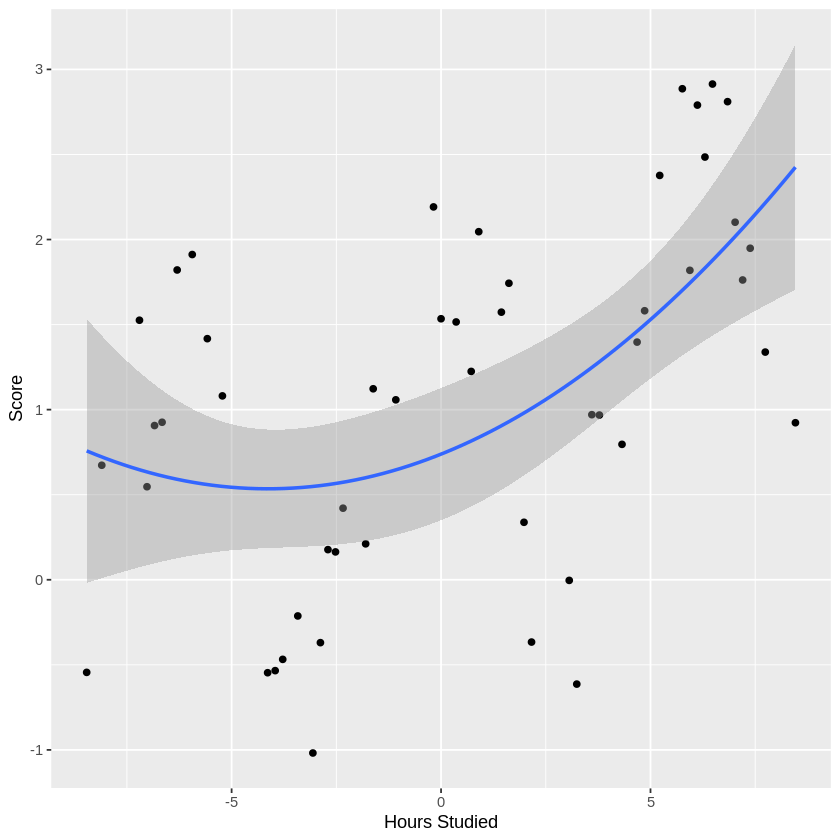

In [5]:
poly_model <- lm(y ~ poly( x, 2), data=df_train)
summary(poly_model)

ggplot(df_train, aes(x=x, y=y)) + 
          geom_point() +
          stat_smooth(method='lm', formula = y ~ poly(x,2), size = 1) + 
          xlab('Hours Studied') +
          ylab('Score')

How well does this 2nd degree polynomial model qualitatively fit the data? Could it do better? 

> *The 2nd degree polynomial does a poor job of fitting the data, I believe that a higher degree polynomial would better reflect the data.*
> 

(b) Fit a 12th degree polynomial to the data. Does this do qualitatively better or worse than the 2nd degree model?


Call:
lm(formula = y ~ poly(x, 12), data = df_train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.86789 -0.25805 -0.00941  0.30116  0.83609 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    1.06643    0.06419  16.614  < 2e-16 ***
poly(x, 12)1   3.56495    0.45390   7.854 2.13e-09 ***
poly(x, 12)2   1.78331    0.45390   3.929 0.000359 ***
poly(x, 12)3  -0.80528    0.45390  -1.774 0.084268 .  
poly(x, 12)4  -1.51281    0.45390  -3.333 0.001960 ** 
poly(x, 12)5   0.20233    0.45390   0.446 0.658373    
poly(x, 12)6  -3.80555    0.45390  -8.384 4.44e-10 ***
poly(x, 12)7   0.75364    0.45390   1.660 0.105290    
poly(x, 12)8   3.09650    0.45390   6.822 4.90e-08 ***
poly(x, 12)9   0.04787    0.45390   0.105 0.916576    
poly(x, 12)10 -1.06892    0.45390  -2.355 0.023938 *  
poly(x, 12)11  0.59160    0.45390   1.303 0.200498    
poly(x, 12)12 -0.48942    0.45390  -1.078 0.287895    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 

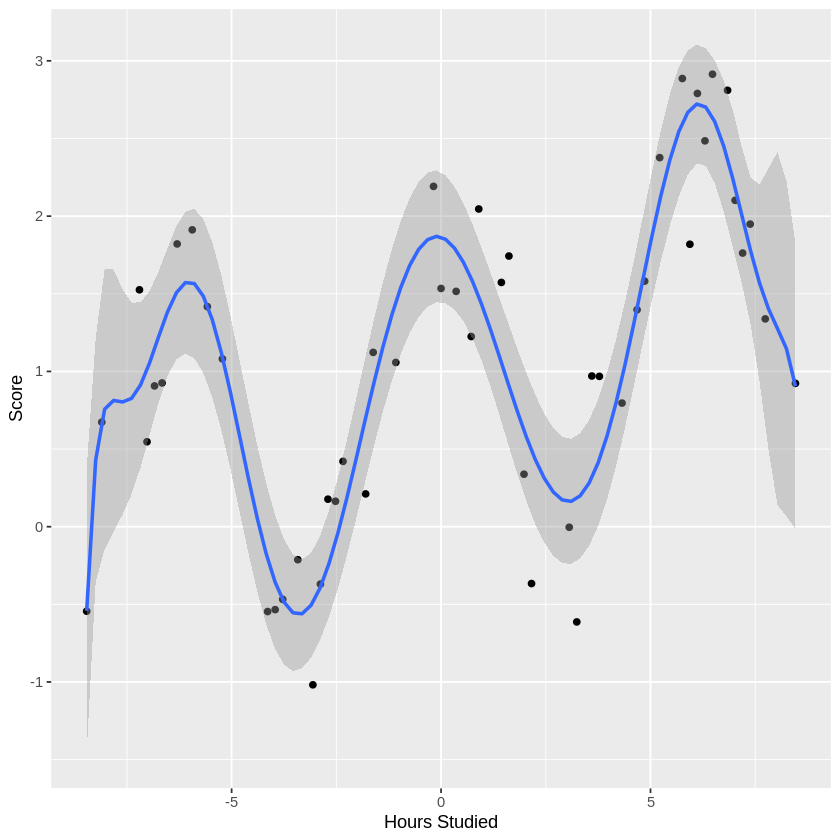

In [6]:
poly_model12 <- lm(y ~ poly( x, 12), data=df_train)
#poly.predict <- cbind(df_train, predict(poly_model))

summary(poly_model12)

ggplot(df_train, aes(x=x, y=y)) + 
          geom_point() +
          stat_smooth(method='lm', formula = y ~ poly(x,12), size = 1) + 
          xlab('Hours Studied') +
          ylab('Score')




```
# This is formatted as code
```

> *The 12th degree polynomial provides a much better qualitative fit to the data than the 2nd degree model* 
> 

(c) Modify the loop below to estimate the bias-variance tradeoff as model complexity (i.e., degree of the polynomial model, $k$) increases from 2 to 50. Use the training data to fit the model and test data to evaluate its predictive accuracy. 

Visualize your results by plotting the *median* squared error for the training data and test data as a function of polynomial degree. 


(**Note**: We are using median accuracies here because there are often 1 or 2 outlier values in the higher degree polynomial models that can throw off the accuracy estimates).

0.5575890
0.5060367
0.4681421
0.4650990
0.2090626
0.2050438


0.3492070
0.4628460
0.2730075
0.3075352
0.2406656
0.2748665


,V1,V2,k
,<dbl>,<dbl>,<int>
1,0.5575890,0.3492070,2
2,0.5060367,0.4628460,3
3,0.4681421,0.2730075,4
4,0.4650990,0.3075352,5
5,0.2090626,0.2406656,6
6,0.2050438,0.2748665,7


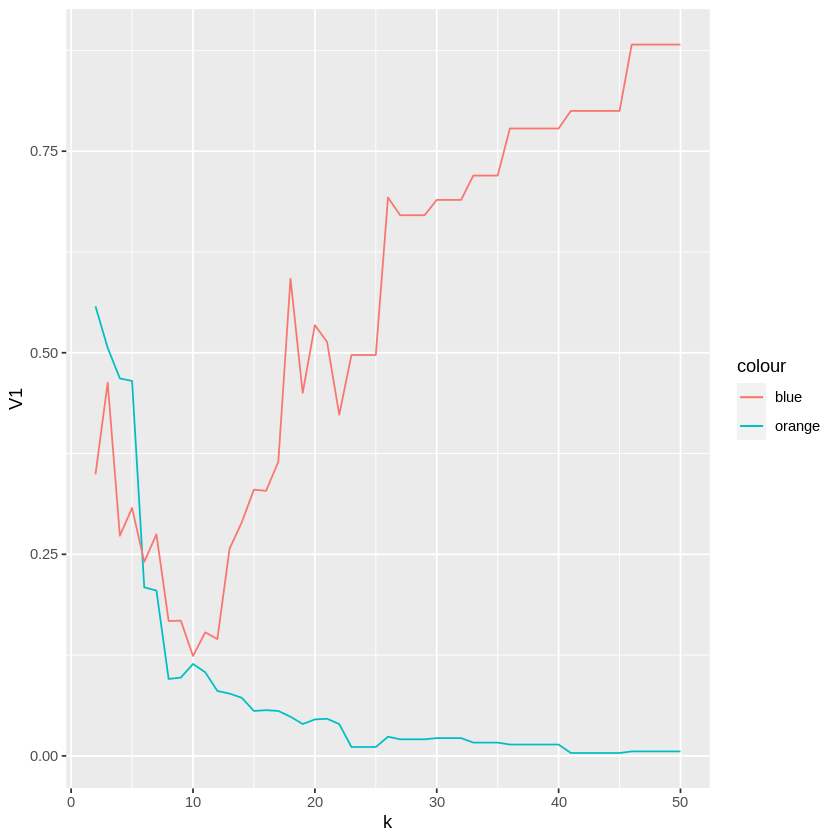

In [7]:
# Now do the variance-bias trade off analysis using regular regression
degree = seq(2,50)

options(warn = -1)

# Need to setup your output vectors
train_rss = matrix(data=NA,nrow=length(degree),ncol=1)
test_rss = matrix(data=NA,nrow=length(degree),ncol=1)
mse = list()

for (k in degree) {
    fit.train = lm(y ~ poly(x,k, raw=T), data=df_train)
    fit.test = predict(fit.train, newdata=df_test)
    train.resd <- fit.train$residuals
    test.resd <- (df_test$y - fit.test)
    train.median <- median((train.resd)^2)
    test.median <- median((test.resd)^2)
    train_rss[k-1, 1] <- train.median
    test_rss[k-1, 1] <- test.median
    #mse <- append(mse, median((fit.test-df_train$y)^2))     
}
#mse
head(train_rss)
head(test_rss)

# Plot your results here
rss_vecs <- cbind(train_rss, test_rss)
df_plot_mse <- as.data.frame(rss_vecs) %>%
  mutate(k = degree)
head(df_plot_mse)
ggplot(df_plot_mse, aes(x=k)) +
  geom_line(aes(y = V1, colour='orange')) + # train 
  geom_line(aes(y = V2, colour='blue'))


What do you see as $k$ increase?

> *The MSE decreases in general for the training data as k increases, but increases as k increases for the test data. This suggests that it is overfitting the training data.* 
> 

(d) Now copy the code above and let's see what happens when we go beyond $p=n$ (remember, in this case $k=p$). Test polynomial models up to $k=150$. Visualize your results by plotting the *median* squared error for the training data and test data as a function of polynomial degree. 

Use the `geom_vline()` function in `ggplot` to draw a vertical line where $k=n$ (here $n$ is the number of observations in the training set). This will make it clear where we cross the threshold for finding *unique* solutions in our data.



,V1,V2,k
,<dbl>,<dbl>,<int>
1,0.5575890,0.3492070,2
2,0.5060367,0.4628460,3
3,0.4681421,0.2730075,4
4,0.4650990,0.3075352,5
5,0.2090626,0.2406656,6
6,0.2050438,0.2748665,7


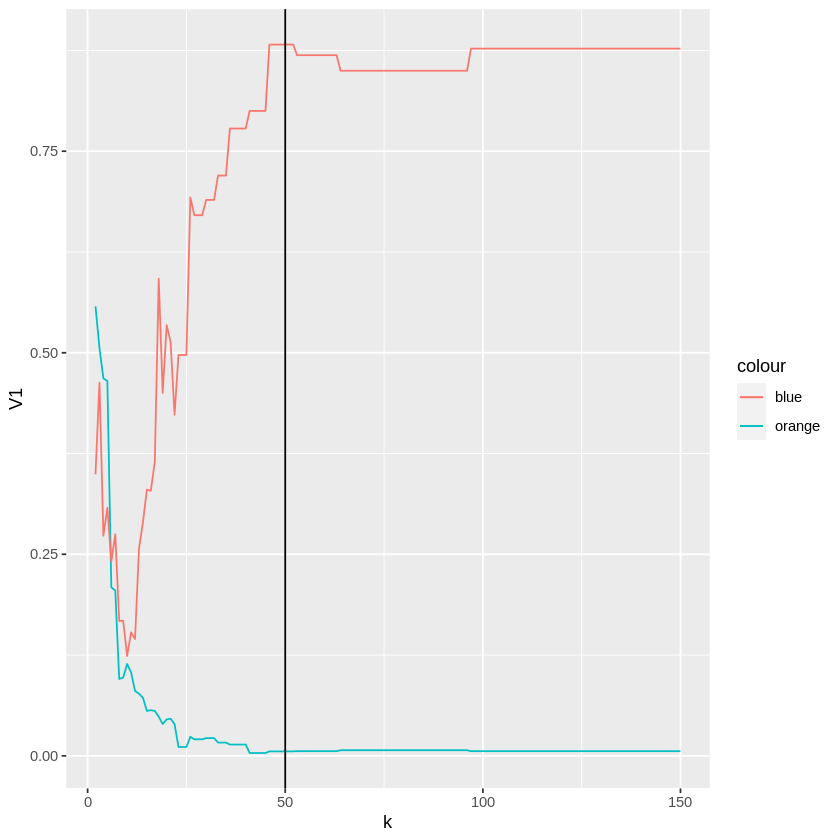

In [8]:
# WRITE YOUR CODE HERE
degree2 = seq(2,150)
options(warn = -1)

# Need to setup your output vectors
train_rss2 = matrix(data=NA,nrow=length(degree2),ncol=1)
test_rss2 = matrix(data=NA,nrow=length(degree2),ncol=1)
mse2 = list()

for (k in degree2) {
    fit.train2 = lm(y ~ poly(x,k, raw=T), data=df_train)
    fit.test2 = predict(fit.train2, newdata=df_test)
    train.resd2 <- fit.train2$residuals
    test.resd2 <- (df_test$y - fit.test2)
    #mse2 <- append(mse2, median((fit.test2-df_train$y)^2))   
    train.median2 <- median((train.resd2)^2)
    test.median2 <- median((test.resd2)^2)
    train_rss2[k-1, 1] <-  train.median2
    test_rss2[k-1, 1]  <- test.median2   
}
       
rss_vecs2 <- cbind(train_rss2, test_rss2)
df_plot_mse2 <- as.data.frame(rss_vecs2) %>%
  mutate(k = degree2)
head(df_plot_mse2)
ggplot(df_plot_mse2, aes(x=k)) +
  geom_line(aes(y = V1, colour='orange')) + # train 
  geom_line(aes(y = V2, colour='blue')) +
  geom_vline(aes(xintercept = nrow(df_train)))


What do you see as $k$ gets larger than $n$?

> *As k goes beyond n, the MSE values plateau at a high level for the test data, and at close to zero for the training data. * 
> 

---
## 3. Applying regularization to the model fits (2 points)

Repeat the previous bias-variance tradeoff test, going up to $k=150$, but now use ridge regression with a sparsity parameter of $\lambda=0.00005$. Plot your results the same way as last time. 

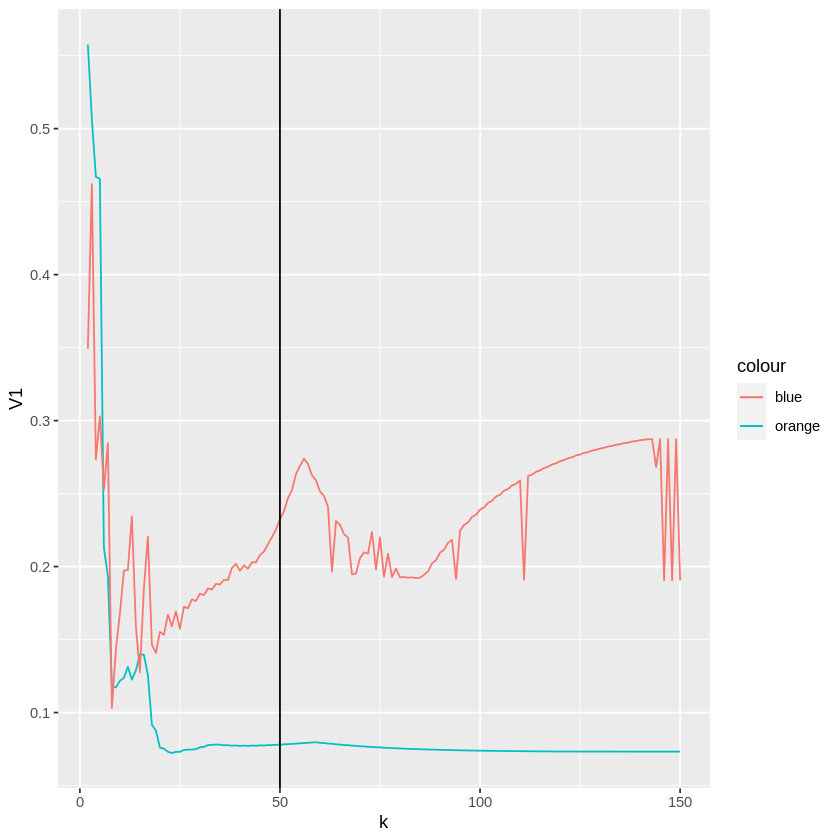

In [9]:
# Now do the variance-bias trade off analysis using ridge regression
lambda=0.00005 # lowest possible test MSE
alpha=0
degree2 = seq(2,150)

train_rss3 = matrix(data=NA,nrow=length(degree2),ncol=1)
test_rss3 = matrix(data=NA,nrow=length(degree2),ncol=1)

# Transform X to matrix
x_train <- as.matrix(df_train$x)
y_train <- as.matrix(df_train$y)
x_test <- as.matrix(df_test$x)
y_test <- as.matrix(df_test$y)

set.seed(1234)
for (k in degree2) {
    fit.train3 = glmnet(poly(x_train, k, raw=T), y_train, alpha=alpha, lambda=lambda)
    # First arg = X matrix
    fit.test3 = predict(fit.train3, newx=poly(x_test, k, raw=T)) #takes in new predictors and gives Y
    test.resd3 <- (y_test - fit.test3) # Actual - predicted Y values
    train.resd3 <- (y_train - predict(fit.train3, newx=poly(x_train, k, raw=T)))
    train.median3 <- median((train.resd3)^2)
    test.median3 <- median((test.resd3)^2)
    train_rss3[k-1, 1] <-  train.median3
    test_rss3[k-1, 1]  <- test.median3   
}

# Plot your results here
rss_vecs3 <- cbind(train_rss3, test_rss3)
df_plot_mse3 <- as.data.frame(rss_vecs3) %>%
  mutate(k = degree2)
ggplot(df_plot_mse3, aes(x=k)) +
  geom_line(aes(y = V1, colour='orange')) + # train 
  geom_line(aes(y = V2, colour='blue')) +
  geom_vline(aes(xintercept = nrow(df_train)))

What happens now when $k$ gets larger than $n$?

> *As k increases in this model, for both the training and test data the MSE starts high and drops sharply around k = 10-15. As k > n, the test data median SE plateaus at about 0.20 - 0.18. Compared to the previous models, the average median SE in this ridge regression model is much lower for the test data, indicating that overfitting is not an issue here.* 
> 

---
## 4. Reflection (2 points)

The simulations above should have shown that, when applying a regularization (i.e., a sparsity constraint), the behavior of the bias-variance tradeoff changes. Explain why this happens.

> *Including a sparsity constraint changes the behavior of the bias-variance tradeoff because it acts to reduce dimensionality. Even though ridge regression doesn't outright remove variables, it reduces the variance of the model by restricting the region of possible beta values (pushes them towards 0) and accounting for predictors that are highly correlated with each other. This prevents high variance and overfitting, which is why we saw the MSE reduced when k > n in the last model, but not the previous models.* 
> 

--- 
## Bonus (1 extra credit point)
Recall that the $p=n$ threshold defines the limit for finding a *unique* solution to $Y=F(X)$ (i.e., there is only one combination of regression coefficients that is *best* at explaining variance in $Y$). With this in mind, what is regularization doing that works around this upper limit?

> *Regularization adds a penalty term (lambda) that adjusts the loss function of the model and prevents excessive flexibility and removes extra weights from features that don't predict data very well. By moving some feature coefficients towards zero, a model that originally has p > n can have its dimensionality reduced and moved towards p = n or even p < n. * 
> 

**DUE:** 5pm EST, April 12, 2023

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here. 
> *Tracie and Adwoa*